<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Gr%C3%A1fico_de_Linha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 25.04.22.Dados.csv to 25.04.22.Dados (8).csv
Encoding: ISO-8859-1
Separador: ';'


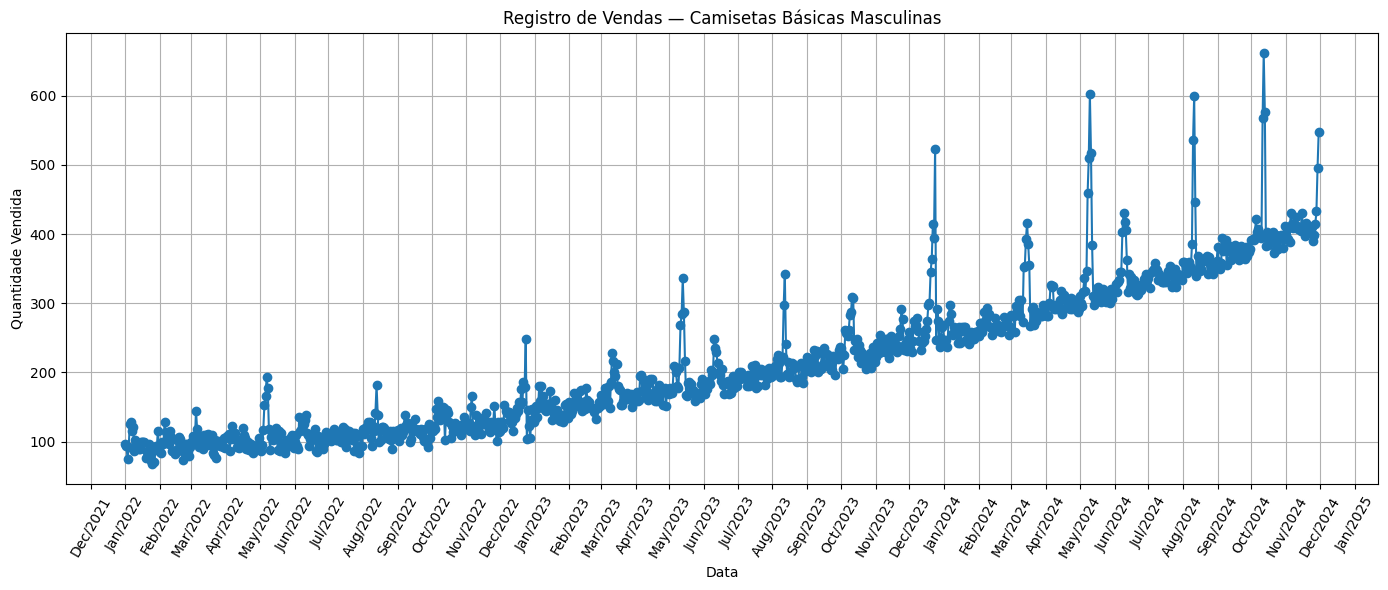

In [26]:
# =======================================================
# 📈  Evolução de vendas
# =======================================================
from google.colab import files
import io, pandas as pd, chardet, matplotlib.pyplot as plt, matplotlib.dates as mdates

# 1. Upload do arquivo
uploaded = files.upload()
nome_arquivo = next(iter(uploaded))
raw = uploaded[nome_arquivo]

# 2. Detectar encoding (fallback latin‑1)
encoding = (chardet.detect(raw[:8000])['encoding']) or 'latin-1'
print('Encoding:', encoding)

# 3. Definir separador
first_line = raw.split(b'\n', 1)[0].decode(encoding, errors='ignore')
sep = ',' if first_line.count(',') > first_line.count(';') else ';'
print('Separador:', repr(sep))

# 4. Ler CSV
dados = pd.read_csv(io.BytesIO(raw), encoding=encoding, sep=sep)

# 5. Converter datas
col_data = 'Timestamp'
col_vendas = 'Camisetas_básicas_masculinas'
dados[col_data] = pd.to_datetime(dados[col_data], dayfirst=True, errors='coerce')

# 6. Ordenar pelos timestamps
dados = dados.dropna(subset=[col_data, col_vendas]).sort_values(col_data)

# 7. Plot registro a registro
plt.figure(figsize=(14,6))                               # ← (opcional) figura maior
plt.plot(dados[col_data], dados[col_vendas],
         marker='o', linestyle='-')

#
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # rótulo em todo mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))  # formato Mes/Ano
plt.xticks(rotation=60)                                      # gira labels 60°
#

plt.title('Registro de Vendas — Camisetas Básicas Masculinas')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.tight_layout()
plt.show()
